# Анализ данных для увеличения выручки интернет-магазина

Цель: Проверить гипотезы с целью увеличения выручки, запустить А/В тестирование

### План работы
1. Ознакомиться с данными
2. Выполнить приоритизацию гипотез
3. Проанализировать А/В тест. 
- Построить графики кумулятивной выручки по группам
- Построить график кумулятивного среднего чека по группам
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A
- Построить график кумулятивного среднего количества заказов на посетителя по группам
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
- Построить точечный график количества заказов по пользователям
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
4. Сформулировать вывод, принять решение продолжать тест/продлить/приоставить

### Описание данных

**Файл /datasets/hypothesis.csv**

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл /datasets/orders.csv**

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv** 

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### 1. Подготовка данных к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

data = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv')

In [2]:
display(data.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [3]:
display(data.head(5))
display(orders.head(5))
display(visitors.head(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

In [5]:
display(data.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

In [6]:
display(data.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [7]:
data = data.rename(columns={'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'})

In [8]:
display('Количество групп в А/Б тесте', visitors['group'].value_counts())
display('Дата начала теста', min(visitors['date']))
display('Дата окончания теста', max(visitors['date']))

'Количество групп в А/Б тесте'

A    31
B    31
Name: group, dtype: int64

'Дата начала теста'

datetime.date(2019, 8, 1)

'Дата окончания теста'

datetime.date(2019, 8, 31)

In [9]:
visitors_new = visitors.groupby('group', as_index=False).agg({'visitors':'sum'})
display('Распределение количества пользователей по группам', visitors_new)

'Распределение количества пользователей по группам'

,group,visitors
0,A,18736
1,B,18916


In [10]:
visitorsA=orders.query('group=="A"')
visitorsA = visitorsA['visitorId']
visitorsA = visitorsA.unique()

visitorsB=orders.query('group=="B"')
visitorsB = visitorsB['visitorId']
visitorsB = visitorsB.unique()

unique_visitors = []

for index in visitorsA:
    if index in visitorsB:
        unique_visitors.append(index)

        
display('Пользователи из группы А присутствующие в группе Б',unique_visitors)

'Пользователи из группы А присутствующие в группе Б'

[4069496402,
 199603092,
 3803269165,
 2378935119,
 237748145,
 4256040402,
 2038680547,
 1738359350,
 2458001652,
 3891541246,
 2716752286,
 3656415546,
 2686716486,
 2954449915,
 2927087541,
 3234906277,
 457167155,
 2579882178,
 3957174400,
 1648269707,
 2780786433,
 818047933,
 2044997962,
 1959144690,
 3202540741,
 1333886533,
 351125977,
 3951559397,
 393266494,
 3984495233,
 4120364173,
 4266935830,
 1230306981,
 1294878855,
 1614305549,
 8300375,
 477780734,
 1668030113,
 3717692402,
 3766097110,
 3941795274,
 471551937,
 1316129916,
 1801183820,
 1602967004,
 2587333274,
 2600415354,
 232979603,
 3972127743,
 1404934699,
 276558944,
 3062433592,
 2654030115,
 3963646447,
 4186807279,
 2712142231,
 2949041841,
 963407295]

Вывод: в первом разделе провела предварительное изучение данных. Данные проверены на дубликаты и пропуски. Дубликаты и пропуски отсутствуют. Столбцы с датами приведены к формату дат. Привела названия колонок к нижнему регистру. Количество групп в А/Б тесте для группы А и Б равное - 31. Дата начала теста 01/08/2019, дата окончания теста 31/08/2019. Распределение количества пользователей по группам: группа А - 18736, Б-18916. Всего 58 уникальных пользователей встречается и в группе А, и в группе Б. Решила оставить, чтобы не потерять уникальные транзакции и суммы покупок.

### 2. Приоритизация гипотез

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [11]:
data['ice'] = ((data['impact']*data['confidence'])/data['efforts'])
display(data.sort_values(by='ice', ascending = False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


In [12]:
data['rice'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
display(data.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Вывод: 

При применении метода ICЕ в приоритете были пункты:
8	Запустить акцию, дающую скидку на товар в день..
0	Добавить два новых канала привлечения трафика..
7	Добавить форму подписки на все основные страницы..

При применении метода RICE приоритетными стали пункты:

7	Добавить форму подписки на все основные страницы..
2	Добавить блоки рекомендаций товаров на сайт ин..
0	Добавить два новых канала привлечения трафика..
6	Показать на главной странице баннеры с актуаль..

Приоритеты пунктов изменились в связи с участием нового компонента Reach, который отвечает за влияние на показатель по пользователям(количество пользователей, которых затронет изменение)

### 3. Анализ A/B-теста

Проанализируйте A/B-тест:

1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [13]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<x['date'], orders['group']==x['group'])].agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']<x['date'], visitors['group']==x['group'])].agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group','orders', 'byers', 'revenue', 'visitors']
display(cumulativeData.head(5))

,date,group,orders,byers,revenue,visitors
0,2019-08-01,A,24.0,20.0,148579.0,719.0
1,2019-08-01,B,21.0,20.0,101217.0,713.0
2,2019-08-02,A,44.0,38.0,242401.0,1338.0
3,2019-08-02,B,45.0,43.0,266748.0,1294.0
4,2019-08-03,A,68.0,62.0,354874.0,1845.0


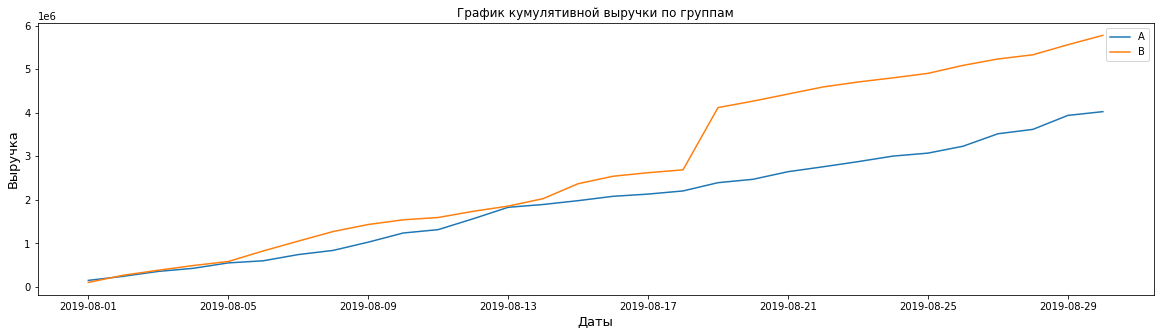

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue','orders']]

plt.figure(figsize=(20,5))
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты', fontsize=13)
plt.ylabel('Выручка', fontsize=13)
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label='B')


plt.legend()

Вывод по п.1: Судя по графикам, выручка растет в течение всего теста. Кривая группы B по сравнению с группой А в период c 17/08/2019 по 21/08/2019 резко выросла. Возможно это связано с увеличением числа заказов.

2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

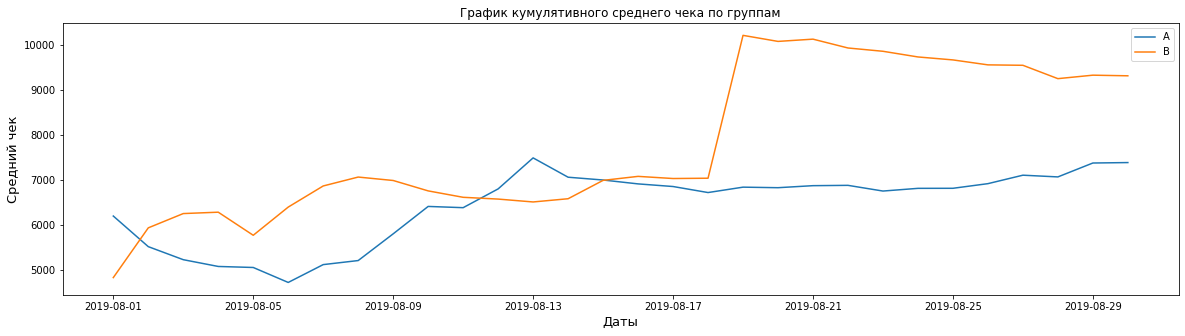

In [15]:
plt.figure(figsize=(20,5))
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты', fontsize=13)
plt.ylabel('Средний чек', fontsize=13)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label ='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.legend()

Вывод по п.2: средний чек становится равномерным ближе к концу теста. По группе А равномерность устанавливается с 13/08/2019, а для группы В с 18/08/2019. По группе В можно отметить резкий всплеск на графике - возможно это были крупные заказы.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

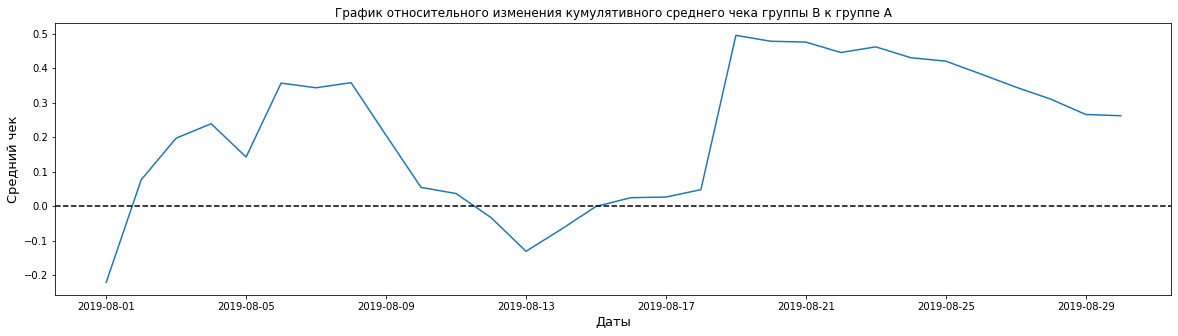

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])

plt.figure(figsize=(20,5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты', fontsize=13)
plt.ylabel('Средний чек', fontsize=13)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

Вывод по п.3: график различия между сегментами в нескольких точках скачет. Скорее всего причиной этому послужили крупные заказы.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

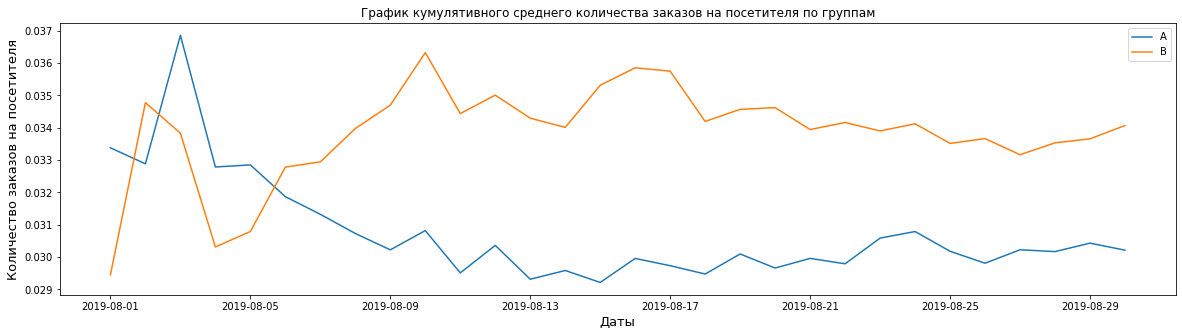

In [17]:
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date', 'visitors','orders']]
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date', 'visitors','orders']]

plt.figure(figsize=(20,5))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Даты', fontsize=13)
plt.ylabel('Количество заказов на посетителя', fontsize=13)
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label ='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label = 'B')
plt.legend()

Вывод по п.4: среднее количество заказов на поситителя по группе А значительно ниже количества заказов по группе В. С 09/08/2019 обе кривые находятся в стабильном состоянии. Различие между группами удерживается в течение стабильного периода примерно на 0,007. В период с 01/08/2019 по 05/08/2019 был резкий всплесе на графике по группе А, по группе В с 01/08/2019 по 09/08/2019. Предполагаю был резкий рост и спад по количеству заказов на одного покупателя, но после 09/08/2019 количество заказов на покупателя стабилизировалось.

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

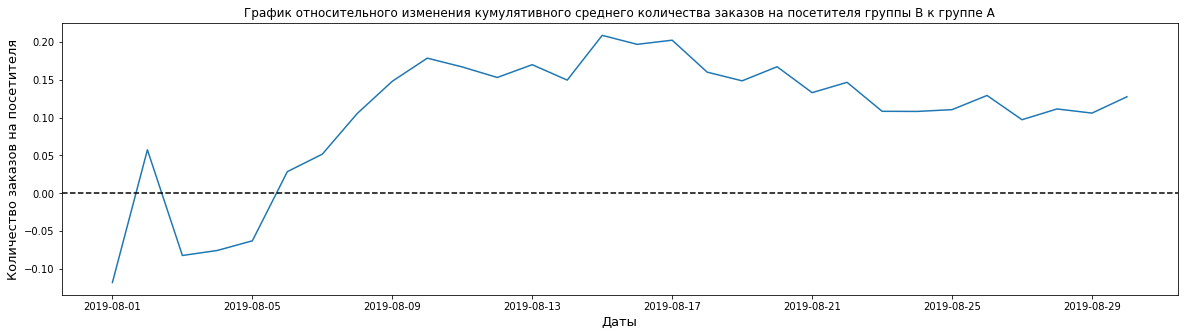

In [18]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB,left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])

plt.figure(figsize=(20,5))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Даты', fontsize=13)
plt.ylabel('Количество заказов на посетителя', fontsize=13)
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])/(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

Вывод по п.5: график изменения кумулятивного среднего количества заказов на посетителя группы В к А скачет в нескольких местах, возможно на такое поведение на графике связано с количесвом заказов в начале периода тестирования

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

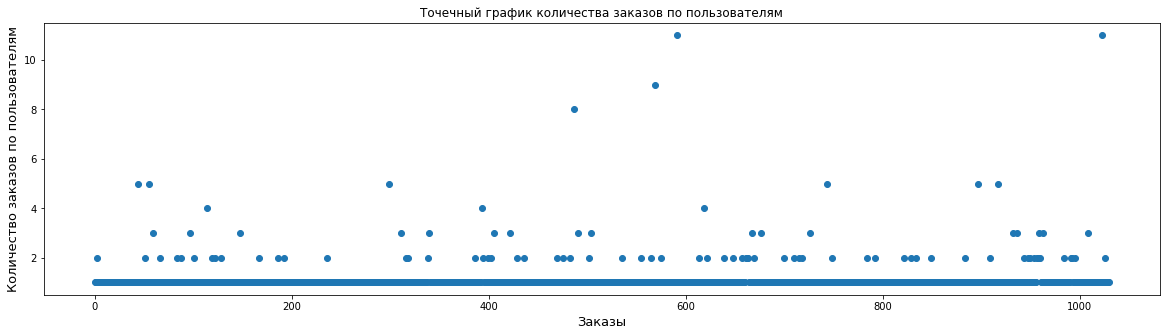

In [19]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(20,5))
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Заказы', fontsize=13)
plt.ylabel('Количество заказов по пользователям', fontsize=13)
plt.scatter(x_values, ordersByUsers['orders']) 

Вывод по п.6: Большая часть пользователей оформляет по 1 заказу. Значительная доля пользователей оформляет от 2-5 заказа за исследуемый период. Есть выбросы по 8-9-10 заказов. Считать их аномалиями или нет не ясно.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [20]:
display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([2., 4.])

In [31]:
order_cnts = int(np.percentile(ordersByUsers['orders'], [95]))

Вывод по п.7: не более 5% пользователей оформляют более 2-х заказов. 1% пользователей оформляет более 4 заказов.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

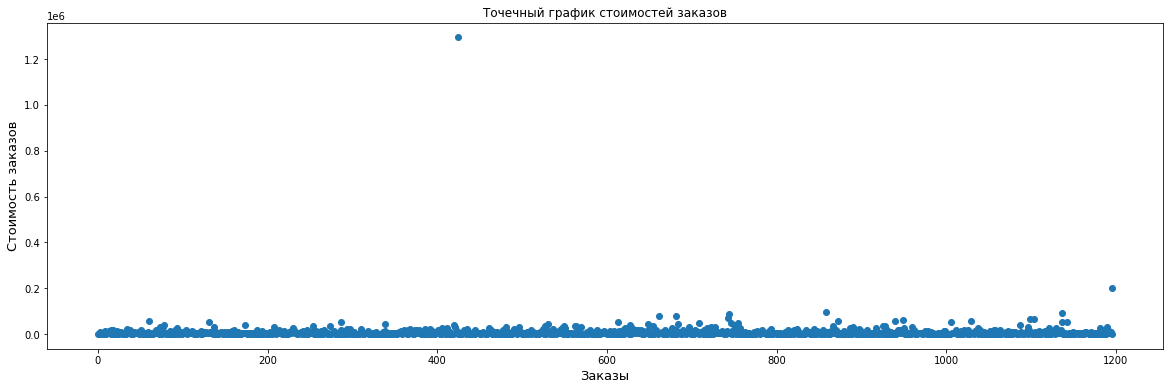

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20,6))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы', fontsize=13)
plt.ylabel('Стоимость заказов', fontsize=13)
plt.scatter(x_values, orders['revenue']) 

Вывод по п.8: заказов с высокой стоимостью немного, есть пара выбросов, которые составляют менее 1%. Основная часть графика расположена в пределах от 0 до 0,2.

9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [22]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

In [23]:
order_cost = int(np.percentile(orders['revenue'], [95]))

Вывод по п.9: не более 5% заказов имеют стоимость более 28000, не более 1% заказов имеют стоимость более 58233.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

 Нулевая: различий в среднем количестве заказов между группами нет. 
 
 Альтернативная: различия в среднем между группами есть.

In [24]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']<=x['date']].agg({'date':'max','visitorsPerDateA':'sum'}), axis=1)
visitorsACummulative.columns=['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns=['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x:visitorsBDaily[visitorsBDaily['date']<=x['date']].agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
visitorsBCummulative.columns=['date', 'visitorsCummulativeB']

ordersADaily=orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date',as_index=False).agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date']<=x['date']].agg({'date':'max', 'ordersPerDateA':'sum', 'revenuePerDateA':'sum'}), axis=1).sort_values(by='date')
ordersACummulative.columns=['date','ordersCummulativeA','revenueCummulativeA']

ordersBDaily=orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date',as_index=False).agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date']<=x['date']].agg({'date':'max', 'ordersPerDateB':'sum', 'revenuePerDateB':'sum'}), axis=1).sort_values(by='date')
ordersBCummulative.columns=['date','ordersCummulativeB','revenueCummulativeB']

mergedVisitorsOrders = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
display(mergedVisitorsOrders.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [25]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(mergedVisitorsOrders['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')


[ordersByUsersA['orders'],pd.Series(0, index=np.arange(mergedVisitorsOrders['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(mergedVisitorsOrders['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(mergedVisitorsOrders['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:',stats.mannwhitneyu(sampleA, sampleB)[1])
print('Относительный прирост среднего числа заказов группы B:',sampleB.mean() / sampleA.mean() - 1)

p-value: 0.016792355056752608
Относительный прирост среднего числа заказов группы B: 0.13807884655320146


Вывод по п.10: Первое число больше 0,05. Нулевую гипотезу, что статистически значимых различий в среднем количестве заказов между группами нет, не отверргаем. Среднее количество заказов второй гораздо выше первой.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезу:
    
    Нулевая гипотеза: различий в среднем чеке между группами нет. 
        
    Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [26]:
print('p-value:', stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('Относительные различия в среднем чеке между группами:', orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

p-value: 0.7292909855432458
Относительные различия в среднем чеке между группами: 0.2587136699126005


Вывод по п.11: Первое число больше 0.05 значит гипотезу о том, что различий в среднем чеке между группами нет, отвергнуть не можем. Средний чек второй группы гораздо ниже.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_cnts]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_cnts]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > order_cost]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


In [28]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(mergedVisitorsOrders['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(mergedVisitorsOrders['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

print('p-value', stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print('Относительный прирост среднего числа заказов группы B:', sampleBFiltered.mean()/sampleAFiltered.mean()-1)

p-value 0.017942888591552505
Относительный прирост среднего числа заказов группы B: 0.14846453749198907


Вывод по п.12: Данные по среднему количеству заказов незначительно выросли, но в целом не сильно изменились

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [29]:
print('p-value:', stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

print('Относительные различия в среднем чеке между группами:', orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)

p-value: 0.9765292921254219
Относительные различия в среднем чеке между группами: -0.016790250458817324


P-value незначительно увеличился, разница между сегментами снизилась до -17%, аномалии влияют на результаты теста.

14. Примите решение по результатам теста и объясните его. Варианты решений:


1) Остановить тест, зафиксировать победу одной из групп.
2) Остановить тест, зафиксировать отсутствие различий между группами.
3) Продолжить тест.

### Вывод:

Суммарная выручка по группе В значительно выше группы А. На графике есть резкий скачок, что свидетельствует о выбросах по группе В. Средний чек по группе В также выше чем среднего чека группы А. Среднее количество заказов по группе В на одного пользователя также выше среднего чека на пользователя чем у группы А.
Изучение точечного графика также показывает выбросы по количеству заказов. Норма от 0 до 3 заказов. Есть единичные выбросы по стоимости заказов, менее 5% имеют стоимость более 28000, не более 1% имеют стоимость  58000.
Статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий не наблюдается.
Есть статистически значимое различие между сырыми и отфильтрованными данными.

График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A, в конце исследуемого периода есть тенденция к снижению среднего чека. Результаты группы В относительно группы А лучше, значиния количества заказов зафиксированы с течение продолжительного срока.

На мой взгляд тест можно остановить, результаты теста признать успешным.